Dimensiones del dataset: (32581, 12)

Tipos de datos:
 person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Primeras 5 filas:
    person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent lo

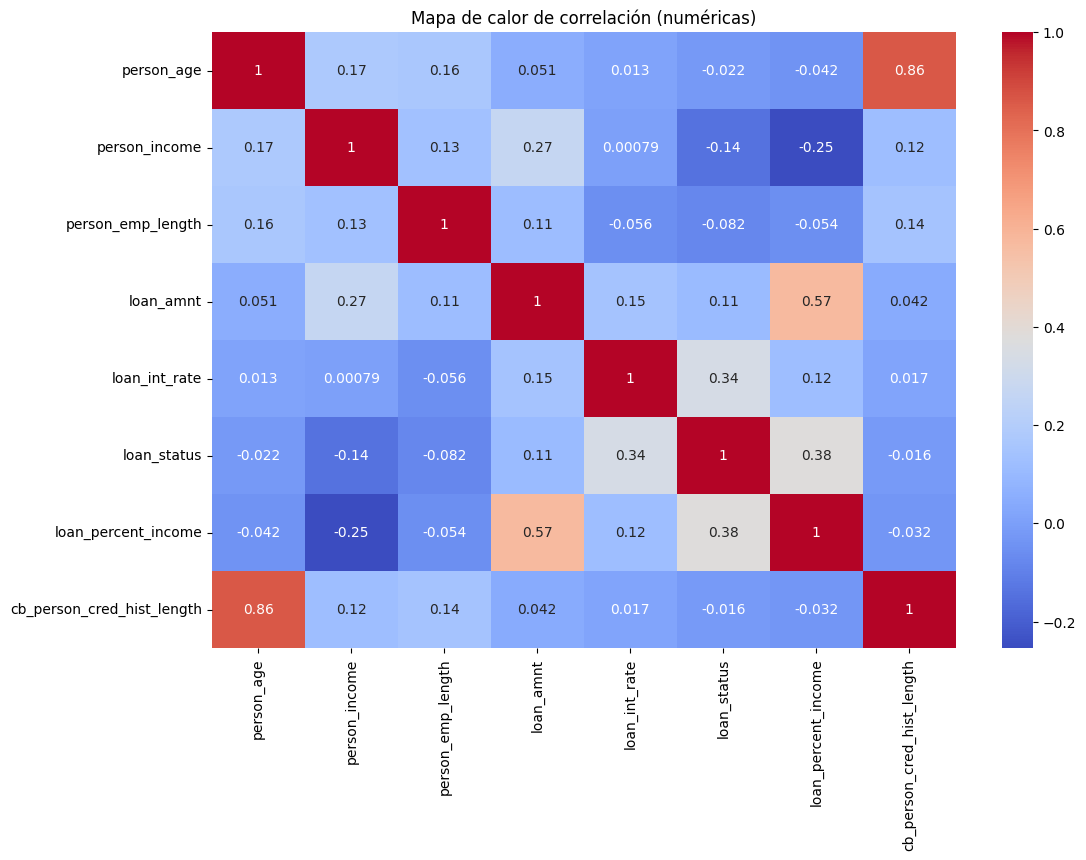

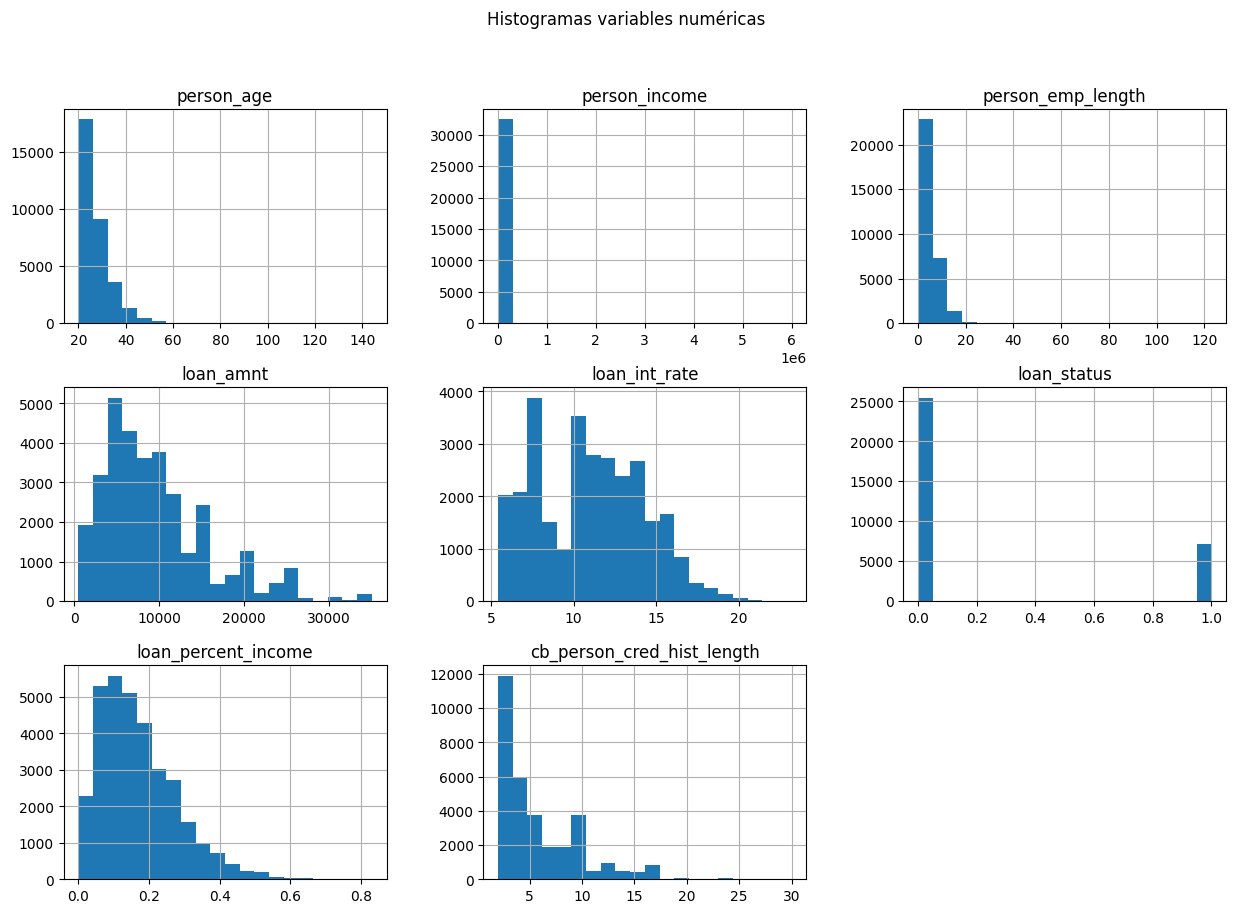

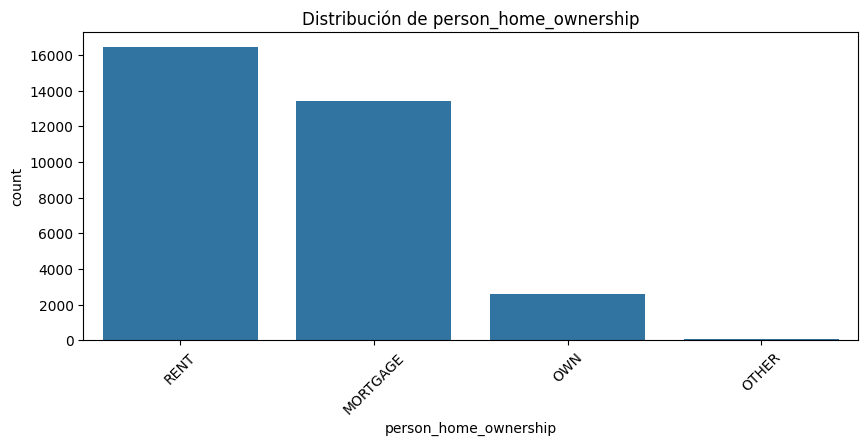

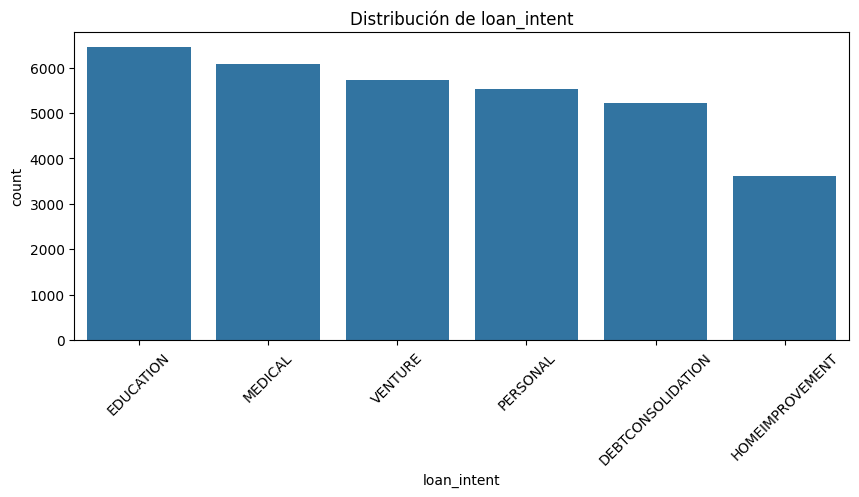

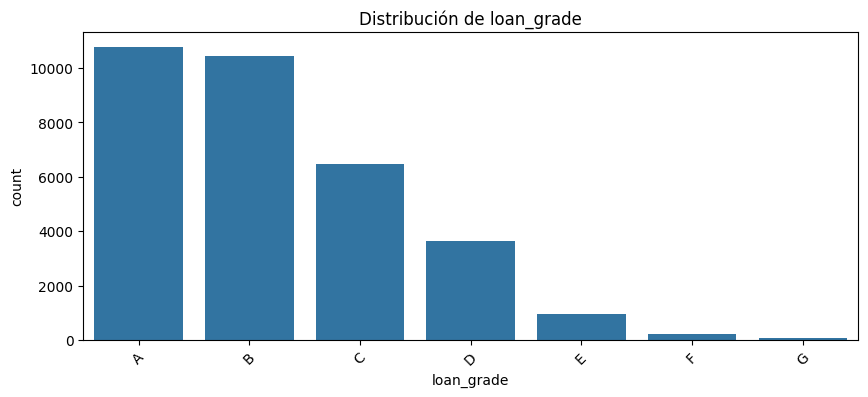

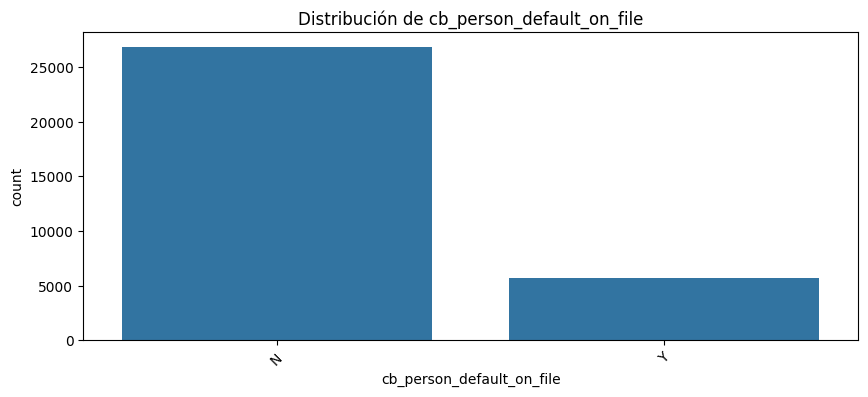

In [9]:
# Exploración Inicial 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset 
df = pd.read_csv('data/credit_risk_dataset.csv')

# 1. Estructura básica 
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nPrimeras 5 filas:\n", df.head())

# 2. Estadísticas descriptivas
print("\nEstadísticas numéricas:\n", df.describe())
print("\nEstadísticas categóricas:\n", df.describe(include=['object']))

# 3. Análisis de variables categóricas
print("\nValores únicos por columna categórica:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

# 4. Matriz de correlación para variables numéricas
num_cols = df.select_dtypes(include=['number'])
print("\nMatriz de correlación variables numéricas:")
print(num_cols.corr())

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación (numéricas)')
plt.show()

# 5. Gráficos básicos

# Histogramas para variables numéricas
num_cols.hist(bins=20, figsize=(15,10))
plt.suptitle('Histogramas variables numéricas')
plt.show()

# Gráficos de barras para variables categóricas
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


In [2]:
import sys
import os


sys.path.append(os.path.abspath("../src"))

from data_loader import load_data

df = load_data('../data/credit_risk_dataset.csv')
df.head()



Datos cargados correctamente desde: ../data/credit_risk_dataset.csv


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Mostrar todas las columnas del DataFrame
print(df.columns)


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [14]:
import sys
import os

# Agregar src al path para importar módulos
sys.path.append(os.path.abspath("../src"))

from data_loader import load_data
from preprocessor import clean_data, encode_features, split_features_target

# Cargar los datos
df = load_data('../data/credit_risk_dataset.csv')

# Procesamiento
df_clean = clean_data(df)

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
df_encoded, le_dict = encode_features(df_clean, categorical_cols)

target_col = 'loan_status'

X, y = split_features_target(df_encoded, target_col)

print("Datos listos para modelar:")
print(X.head())
print(y.head())

from sklearn.model_selection import train_test_split

# 4. Separar train y test (
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 5. GridSearch para Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Eliminé 'auto' y agregué 'log2' y None para más opciones válidas
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score CV:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# 6. Evaluar en test
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = best_rf.predict(X_test)

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))



Datos cargados correctamente desde: ../data/credit_risk_dataset.csv
Datos listos para modelar:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            4           3      35000          16.02                 0.59   
1            1           1       1000          11.14                 0.10   
2            3           2       5500          12.87                 0.57   
3            3           2      35000          15.23                 0.53   
4            3           2      35000          14.27                 0.55  

In [4]:
import sys
import os
sys.path.append(os.path.abspath("../src"))  
from model import CreditRiskModel


crm = CreditRiskModel(n_estimators=100, test_size=0.2, random_state=42)
crm.split_data(X, y)
crm.train()
crm.predict()
crm.evaluate()


Accuracy: 0.93053850201719

Matriz de confusión:
[[4429   34]
 [ 362  876]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4463
           1       0.96      0.71      0.82      1238

    accuracy                           0.93      5701
   macro avg       0.94      0.85      0.89      5701
weighted avg       0.93      0.93      0.93      5701



In [8]:
import sys
import os

# Agregar src al path 

sys.path.append(os.path.abspath("../src"))

from models.gradient_boosting_model import GradientBoostingModel

# Entrenar y evaluar Gradient Boosting
gb_model = GradientBoostingModel()
best_gb = gb_model.train(X_train, y_train)
gb_model.evaluate(X_test, y_test)



Accuracy: 0.9328188037186459

Matriz de confusión:
[[4423   40]
 [ 343  895]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4463
           1       0.96      0.72      0.82      1238

    accuracy                           0.93      5701
   macro avg       0.94      0.86      0.89      5701
weighted avg       0.93      0.93      0.93      5701



,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None
